Impor Library:
-
- Pandas: Pustaka untuk manipulasi dan analisis data.
- Matplotlib: Digunakan untuk membuat visualisasi data.
- KMeans: Algoritma untuk melakukan klustering.
- PCA (Principal Component Analysis): Teknik untuk mereduksi dimensi data.
- Silhouette Score: Metode untuk mengevaluasi kualitas kluster.
- StandardScaler: Digunakan untuk menstandarisasi fitur-fitur numerik.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Membaca Dataset:
-
- Membaca dataset dari file CSV menggunakan pd.read_csv().
- Menampilkan 5 baris pertama untuk mendapatkan gambaran umum tentang data.
- Menampilkan nama-nama kolom dalam dataset.

In [4]:
# Ganti 'student-mat.csv' dengan lokasi file Anda
file_path = 'student-mat.csv'
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dataset
print(df.head())

# Menampilkan nama kolom dalam dataset
print("Kolom dalam dataset:", df.columns.tolist())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
Kolom dalam dataset: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', '

Informasi Dasar Dataset:
-
- df.info(): Menampilkan informasi tentang jumlah entri, kolom, dan tipe data dari setiap kolom.
- df.describe(): Menghasilkan statistik deskriptif untuk kolom numerik, seperti rata-rata, standar deviasi, dan nilai minimum dan maksimum.

In [5]:
# Informasi dataset
df.info()

# Statistik deskriptif kolom numerik
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Menghapus Data Duplikat:
-
- Menghapus baris duplikat dalam dataset untuk memastikan integritas data.
- Menampilkan bentuk dataset setelah penghapusan duplikat.

In [6]:
df.drop_duplicates(inplace=True)
print(f"Dataset setelah menghapus duplikat: {df.shape}")


Dataset setelah menghapus duplikat: (395, 33)


Memeriksa Nilai Yang Hilang:
-
- Memeriksa apakah ada nilai yang hilang dalam dataset.
- Jika ada, menampilkan kolom yang memiliki nilai hilang; jika tidak, mencetak bahwa tidak ada nilai yang hilang.

In [7]:
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("Kolom dengan nilai yang hilang:")
    print(missing_values[missing_values > 0])
else:
    print("Tidak ada nilai yang hilang.")


Tidak ada nilai yang hilang.


Identifikasi Kolom Numerik:
-
Mengidentifikasi kolom-kolom yang memiliki tipe data numerik (integer dan float) untuk keperluan analisis lebih lanjut.

In [8]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Kolom numerik:", numerical_columns)


Kolom numerik: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


Standarisasi Data:
-
Menggunakan StandardScaler untuk menstandarisasi data numerik. Ini penting karena algoritma klustering seperti K-Means sensitif terhadap skala fitur.

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])

Visualisasi Outlier Dengan Boxplot:
-
Membuat boxplot untuk setiap kolom numerik untuk memvisualisasikan adanya outlier sebelum penanganan.

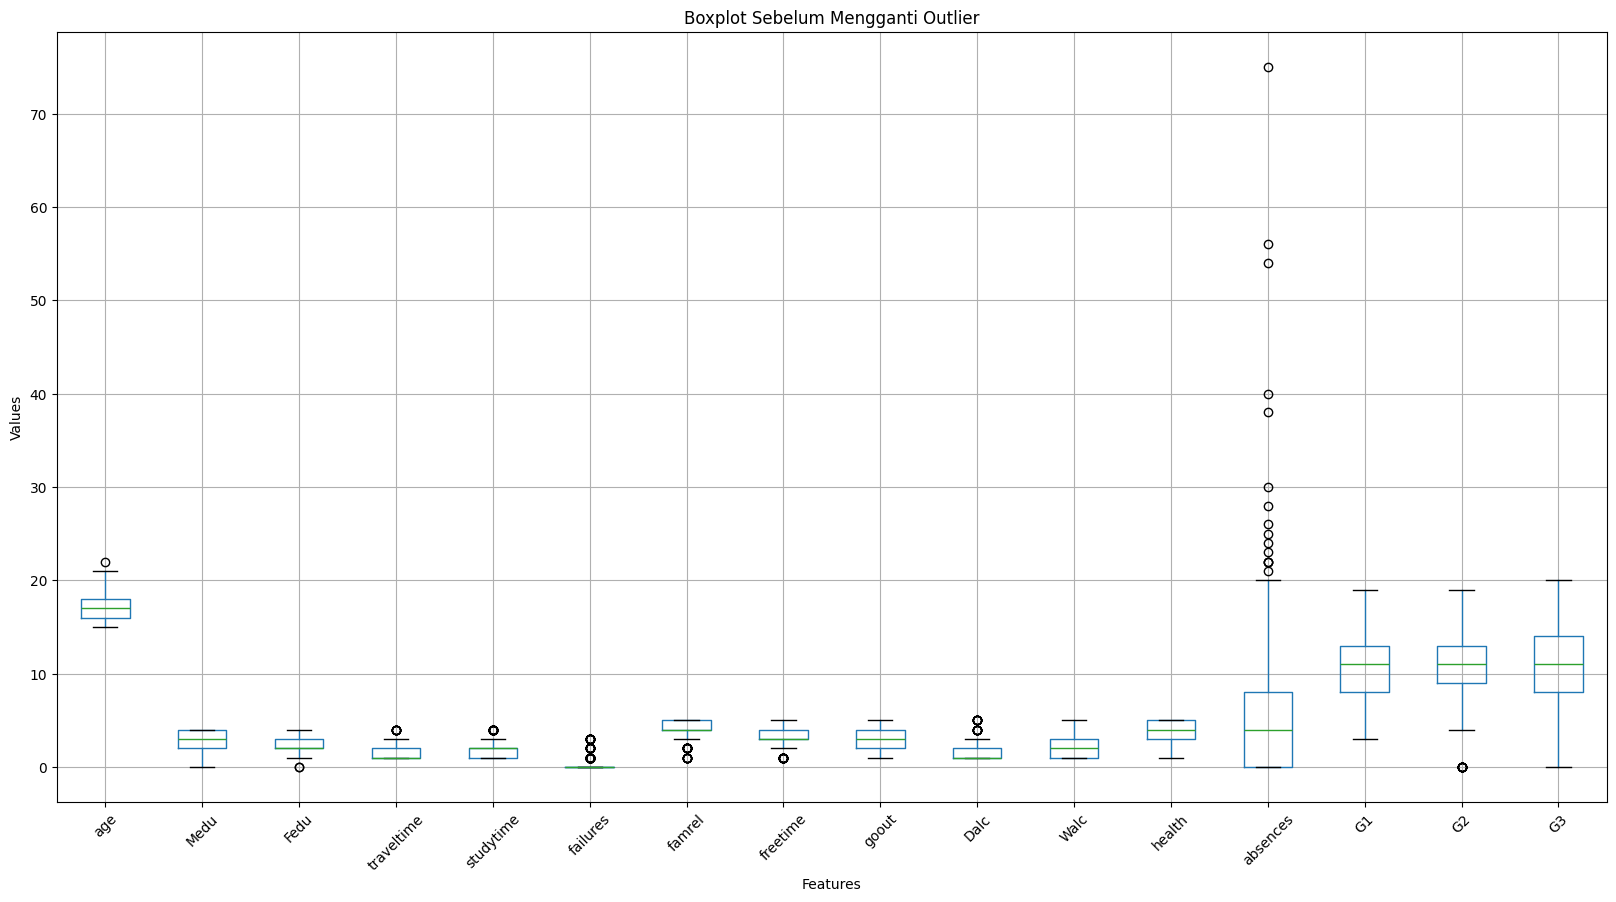

In [10]:
plt.figure(figsize=(20, 10))
df.boxplot(column=numerical_columns, rot=45)
plt.title('Boxplot Sebelum Mengganti Outlier')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


Menangani Outlier:
- 
- Mendefinisikan fungsi untuk mengganti outlier dengan batas whisker dari boxplot.
- Menggunakan fungsi tersebut untuk setiap kolom numerik dalam dataset.

In [11]:
def replace_outliers_with_whiskers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

for column in numerical_columns:
    replace_outliers_with_whiskers(df, column)


Visualisasi Setelah Penanganan Outlier:
-
Membuat boxplot lagi setelah penanganan outlier untuk melihat perubahan dan memastikan bahwa outlier telah ditangani dengan baik.

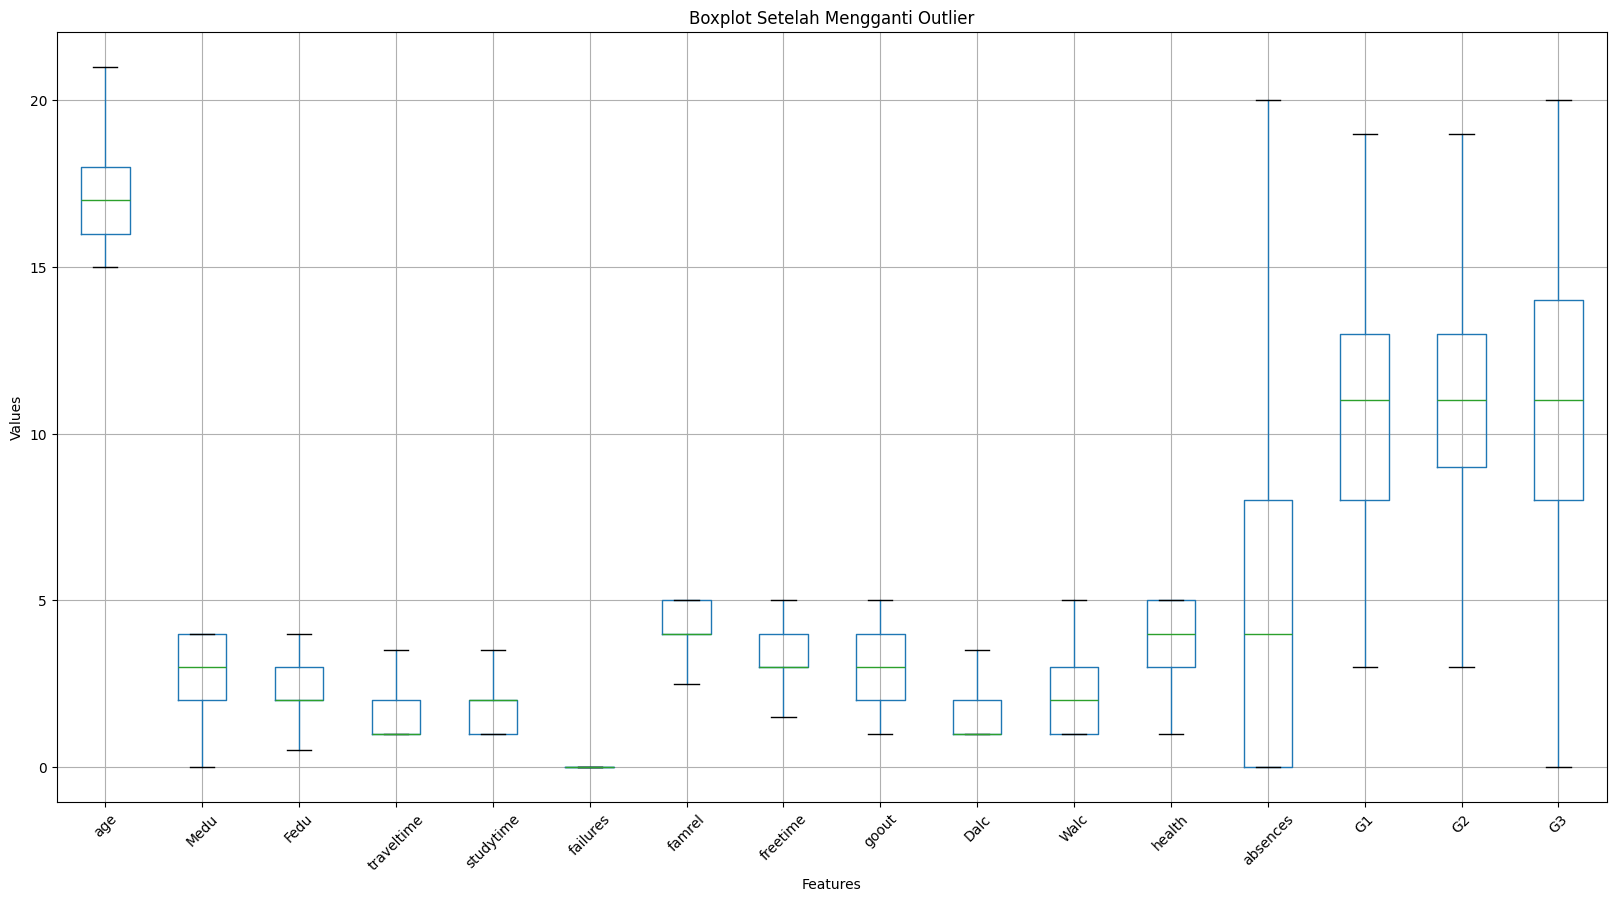

In [12]:
plt.figure(figsize=(20, 10))
df.boxplot(column=numerical_columns, rot=45)
plt.title('Boxplot Setelah Mengganti Outlier')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


Simpan Dataset yang Telah Dibersihkan:
-
Membuat boxplot lagi setelah penanganan outlier untuk melihat perubahan dan memastikan bahwa outlier telah ditangani dengan baik.

In [13]:
df.to_csv('cleaned_student_mat.csv', index=False)


Penerapan K-Means Clustering:
-
- Menentukan jumlah kluster yang diinginkan (k=3).
- Menerapkan algoritma K-Means pada data dan menambahkan kolom baru yang menunjukkan kluster untuk setiap entri.
- Menampilkan hasil klustering dengan menampilkan beberapa kolom dari dataset.

In [14]:
# Menentukan jumlah kluster
k = 3  # Misalnya kita ingin 3 kluster
kmeans = KMeans(n_clusters=k, random_state=42)

# Melatih model dan menambahkan kolom kluster ke DataFrame
df['Cluster'] = kmeans.fit_predict(df[numerical_columns])

# Menampilkan hasil klustering
print(df[['Cluster'] + numerical_columns].head())


   Cluster  age  Medu  Fedu  traveltime  studytime  failures  famrel  \
0        0   18     4   4.0         2.0        2.0         0     4.0   
1        0   17     1   1.0         1.0        2.0         0     5.0   
2        1   15     1   1.0         1.0        2.0         0     4.0   
3        2   15     4   2.0         1.0        3.0         0     3.0   
4        0   16     3   3.0         1.0        2.0         0     4.0   

   freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       3.0      4   1.0     1       3         6   5   6   6  
1       3.0      3   1.0     1       3         4   5   5   6  
2       3.0      2   2.0     3       3        10   7   8  10  
3       2.0      2   1.0     1       5         2  15  14  15  
4       3.0      2   1.0     2       5         4   6  10  10  


Visualiasai Kluster dengan PCA (Principal Component Analysis)
-
teknik statistik yang digunakan untuk mereduksi dimensi data sambil mempertahankan sebanyak mungkin variasi dalam dataset. Ini adalah metode yang sangat berguna dalam analisis data, terutama ketika Anda bekerja dengan dataset yang memiliki banyak fitur (variabel). 

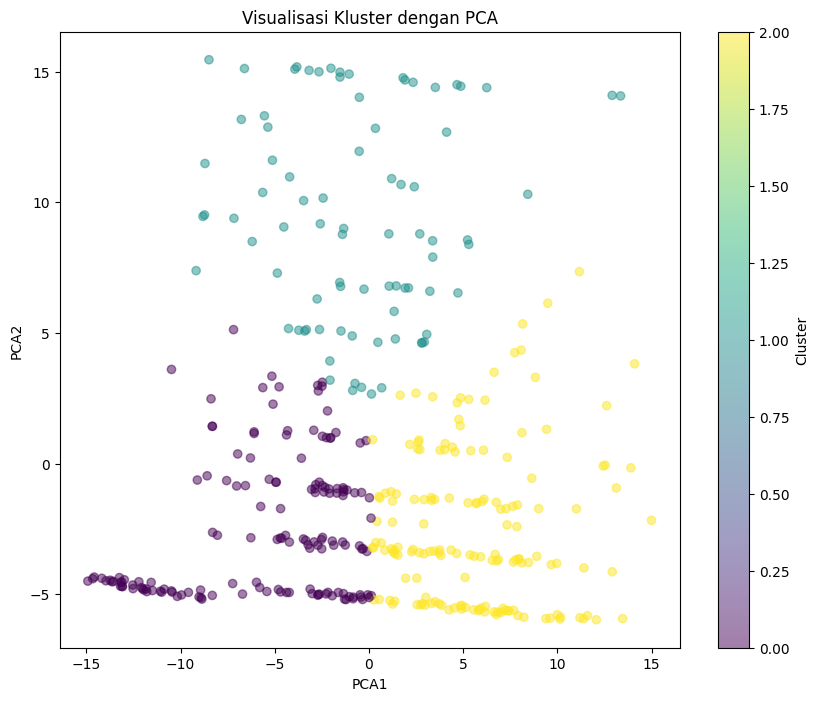

In [15]:
# Reduksi dimensi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[numerical_columns])

# Menambahkan hasil PCA ke DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Visualisasi kluster
plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Visualisasi Kluster dengan PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()


Analisis Karakteristik Kluster
-
Menghitung rata-rata dari setiap fitur numerik untuk masing-masing kluster. Ini membantu memahami karakteristik unik dari setiap kluster.

In [16]:
# Menghitung rata-rata untuk setiap kluster
cluster_summary = df.groupby('Cluster')[numerical_columns].mean()
print(cluster_summary)


               age     Medu      Fedu  traveltime  studytime  failures  \
Cluster                                                                  
0        16.686275  2.45098  2.320261    1.519608   1.964052       0.0   
1        17.192771  3.00000  2.548193    1.433735   1.885542       0.0   
2        16.440252  2.90566  2.707547    1.361635   2.097484       0.0   

           famrel  freetime     goout      Dalc      Walc    health  \
Cluster                                                               
0        4.058824  3.228758  3.183007  1.405229  2.261438  3.660131   
1        3.831325  3.271084  3.289157  1.656627  2.734940  3.433735   
2        4.025157  3.283019  2.943396  1.349057  2.088050  3.515723   

          absences         G1         G2         G3  
Cluster                                              
0         2.385621   8.183007   8.032680   6.764706  
1        14.433735  10.277108   9.891566   9.975904  
2         3.056604  13.861635  13.968553  14.157233  


Evaluasi Kualitas Kluster
-

1. Silhouette Score: Menghitung nilai silhouette untuk menilai seberapa baik kluster yang dihasilkan. Nilai yang lebih tinggi menunjukkan kluster yang lebih baik.

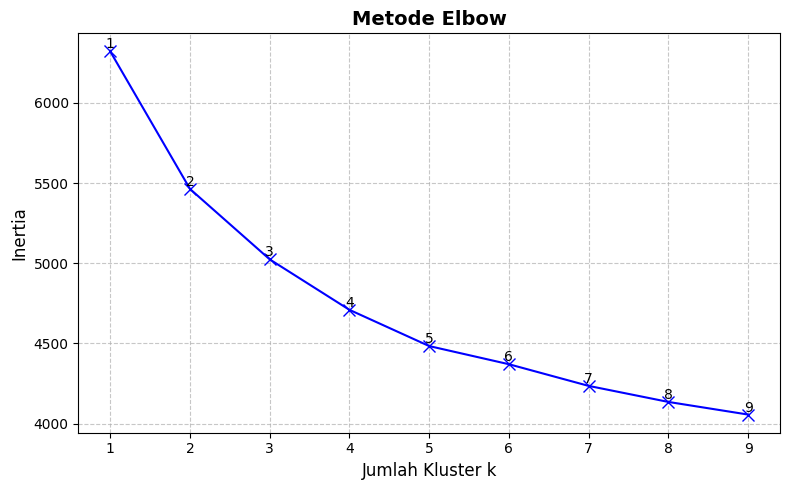

In [17]:
silhouette_avg = silhouette_score(scaled_data, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')


2. Metode Elbow: Menggunakan metode elbow untuk menentukan jumlah kluster yang optimal dengan menghitung inertia (jumlah jarak kuadrat dari titik ke pusat kluster) untuk berbagai nilai k.

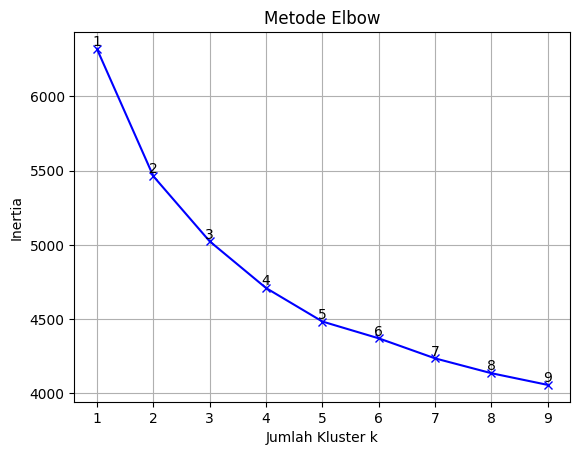

In [19]:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(K, inertia, 'bx-')
plt.xlabel('Jumlah Kluster k')
plt.ylabel('Inertia')
plt.title('Metode Elbow')

# Menambahkan anotasi untuk setiap nilai k dengan penyesuaian posisi
for i, value in enumerate(inertia):
    plt.text(K[i], value, str(K[i]), fontsize=10, ha='center', va='bottom', color='black')

plt.grid(True)  # Menambahkan grid untuk membantu visualisasi
plt.show()


Analisis Lebih Dalam Terhadap Setiap Kluster
-

1. Visualisasi Distribusi: Membuat visualisasi distribusi untuk setiap kluster menggunakan boxplot untuk melihat perbedaan antara kluster.

<Figure size 200x100 with 0 Axes>

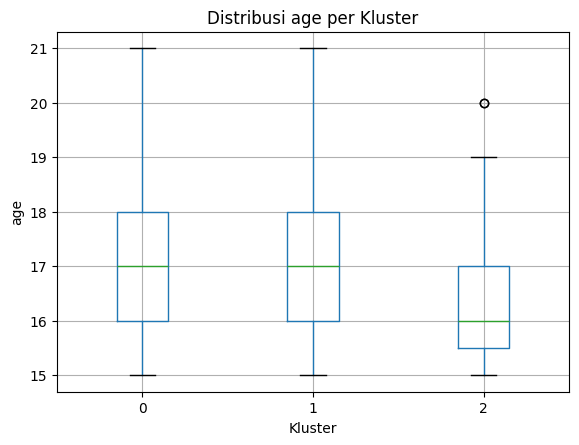

<Figure size 200x100 with 0 Axes>

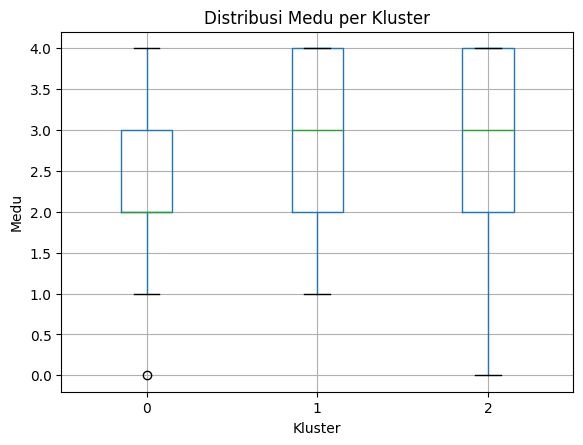

<Figure size 200x100 with 0 Axes>

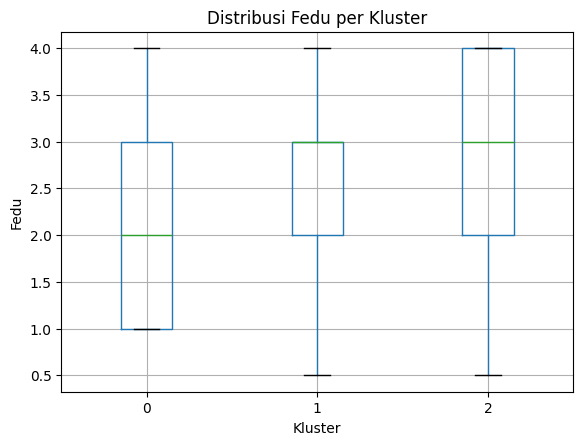

<Figure size 200x100 with 0 Axes>

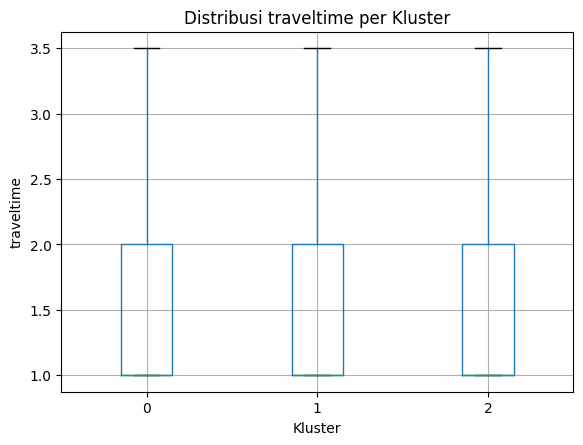

<Figure size 200x100 with 0 Axes>

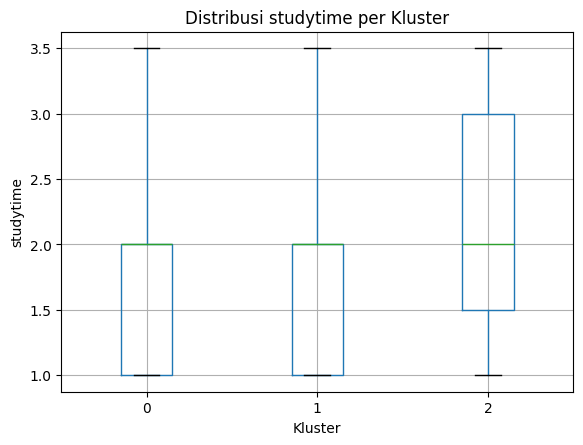

<Figure size 200x100 with 0 Axes>

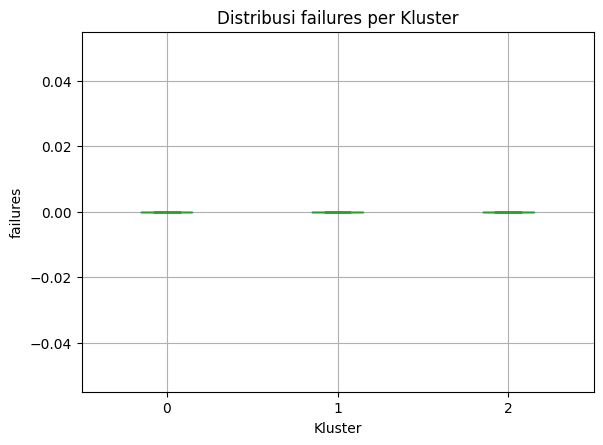

<Figure size 200x100 with 0 Axes>

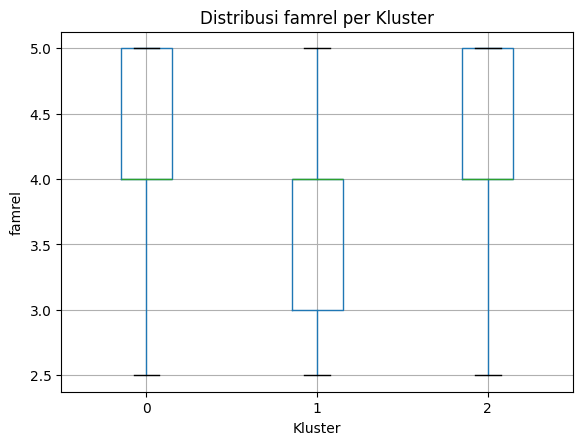

<Figure size 200x100 with 0 Axes>

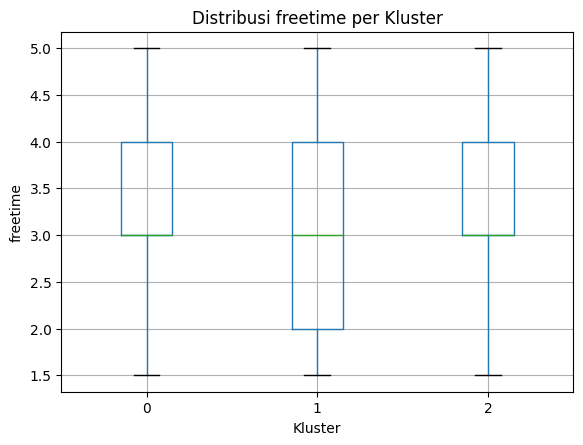

<Figure size 200x100 with 0 Axes>

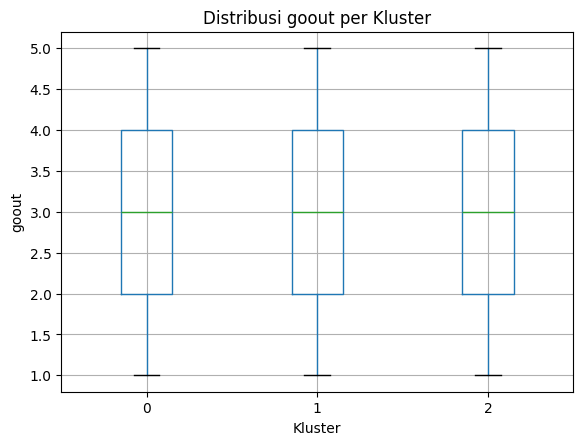

<Figure size 200x100 with 0 Axes>

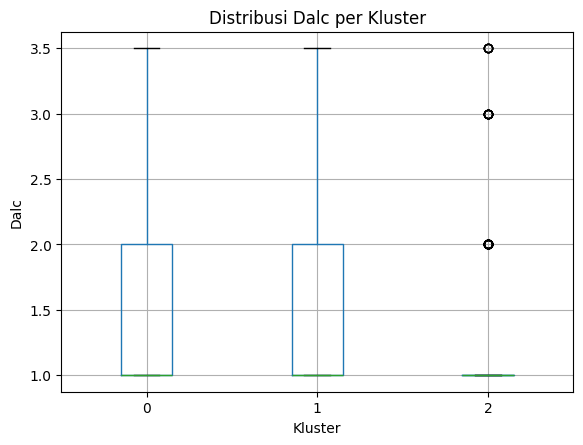

<Figure size 200x100 with 0 Axes>

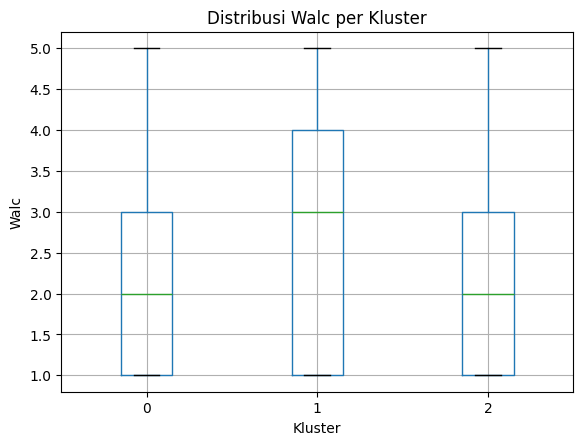

<Figure size 200x100 with 0 Axes>

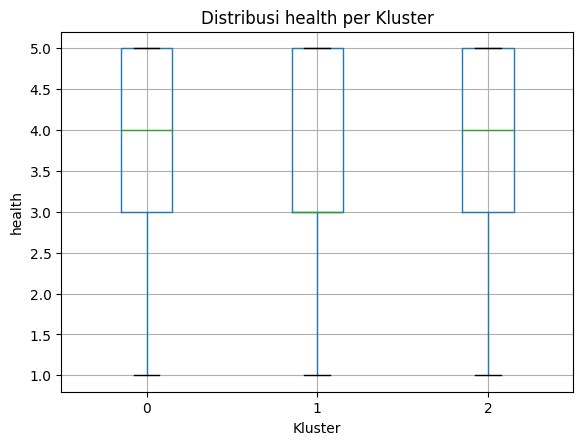

<Figure size 200x100 with 0 Axes>

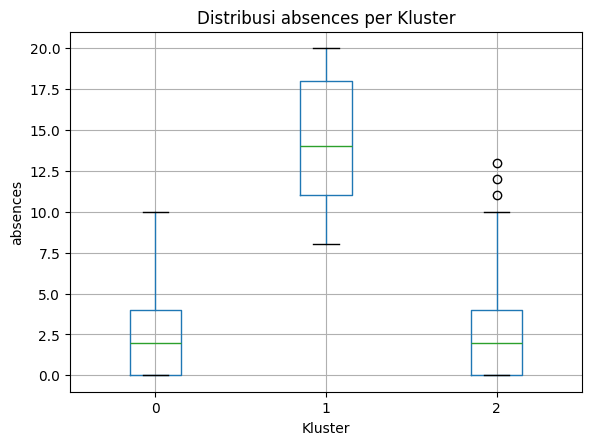

<Figure size 200x100 with 0 Axes>

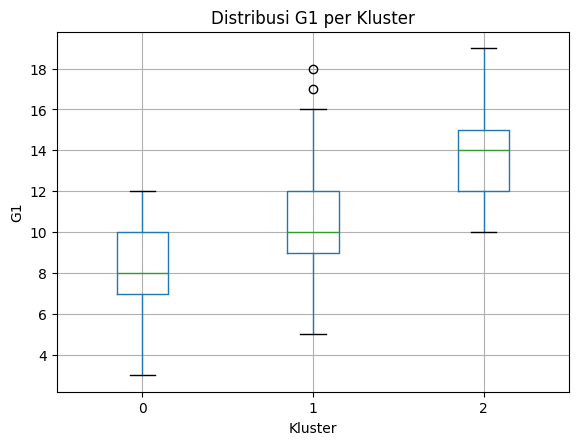

<Figure size 200x100 with 0 Axes>

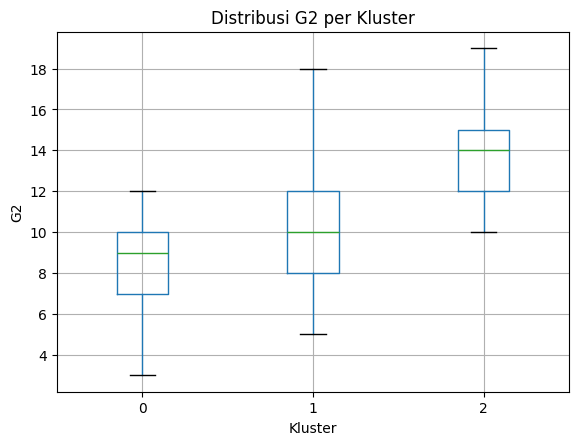

<Figure size 200x100 with 0 Axes>

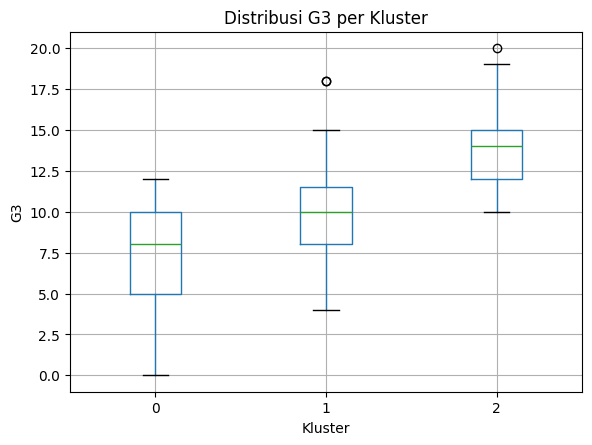

In [25]:
for col in numerical_columns:
    plt.figure(figsize=(2, 1))
    df.boxplot(column=col, by='Cluster')
    plt.title(f'Distribusi {col} per Kluster')
    plt.suptitle('')
    plt.xlabel('Kluster')
    plt.ylabel(col)
    plt.show()


2. Profil Kluster: Buat profil untuk setiap kluster dengan menghitung rata-rata fitur numerik untuk memahami karakteristik unik dari masing-masing kluster.

In [57]:
cluster_profiles = df.groupby('Cluster')[numerical_columns].mean()
print("Profil Kluster:")
print(cluster_profiles)


Profil Kluster:
               age     Medu      Fedu  traveltime  studytime  failures  \
Cluster                                                                  
0        16.686275  2.45098  2.320261    1.519608   1.964052       0.0   
1        17.192771  3.00000  2.548193    1.433735   1.885542       0.0   
2        16.440252  2.90566  2.707547    1.361635   2.097484       0.0   

           famrel  freetime     goout      Dalc      Walc    health  \
Cluster                                                               
0        4.058824  3.228758  3.183007  1.405229  2.261438  3.660131   
1        3.831325  3.271084  3.289157  1.656627  2.734940  3.433735   
2        4.025157  3.283019  2.943396  1.349057  2.088050  3.515723   

          absences         G1         G2         G3  
Cluster                                              
0         2.385621   8.183007   8.032680   6.764706  
1        14.433735  10.277108   9.891566   9.975904  
2         3.056604  13.861635  13.968553 